<a href="https://colab.research.google.com/github/SophiaCordes/health-provider-network_clustering/blob/main/MASSHINE_Assignment_Cordes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network and clustering analysis using (synthetic) health care provider data of patient-sharings
###*MASSHINE Summer School Assignment by Sophia Cordes, University of Hamburg (sophia.cordes@uni-hamburg.de)*
14/10/2024


Objective: Insights (characteristics/ strucutre) of provider clusters (can be interpreted as "Physician peer groups"), in which physicians usually exchange patients (e.g. via referral)

Data: Using a synthetic data set created by ChatGPT 4o

Approach: Combining two synthetic data sets for Network analysis (weighted network, analysis of centrality measures) and non-hierarchical clustering analysis (testing Louvain and k-means)





In [1]:
# import packages
import pandas as pd
import numpy as np
import networkx as nx

from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import metrics
from sklearn.metrics import davies_bouldin_score

In [21]:
%cd /content
!wget https://raw.githubusercontent.com/SophiaCordes/health-provider-network_clustering/main/provider_categories.csv
!wget https://raw.githubusercontent.com/SophiaCordes/health-provider-network_clustering/main/synthetic_patient_sharing_network.csv


/content
--2024-10-14 13:53:07--  https://raw.githubusercontent.com/SophiaCordes/health-provider-network_clustering/main/provider_categories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1300 (1.3K) [text/plain]
Saving to: ‘provider_categories.csv.1’

provider_categories 100%[===================>]   1.27K  --.-KB/s    in 0s      

2024-10-14 13:53:07 (26.7 MB/s) - ‘provider_categories.csv.1’ saved [1300/1300]

--2024-10-14 13:53:07--  https://raw.githubusercontent.com/SophiaCordes/health-provider-network_clustering/main/synthetic_patient_sharing_network.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [22]:
# Load the CSV file into a DataFrame
provider_categories = pd.read_csv('provider_categories.csv')
synthetic_patient_sharing_network = pd.read_csv('synthetic_patient_sharing_network.csv')

In [23]:
# Display the first 5 rows of the data
provider_categories.head()

,Provider_ID,Category
0,402533494,University Clinic
1,749431082,Reha Center
2,326161867,Acute Clinic
3,870530217,Reha Center
4,468164906,Endocrinology Practice


,Provider_ID,Category
0,402533494,University Clinic
1,749431082,Reha Center
2,326161867,Acute Clinic
3,870530217,Reha Center
4,468164906,Endocrinology Practice


In [24]:
# Display the first 5 rows of the data
provider_categories.head()
synthetic_patient_sharing_network.head()

,Sender_Provider_ID,Receiver_Provider_ID,Number_of_shared_patients
0,841976666,147337803,228
1,383450553,496442646,272
2,491541578,702269164,552
3,402533494,260045822,645
4,692362342,927982963,97


,Sender_Provider_ID,Receiver_Provider_ID,Number_of_shared_patients
0,841976666,147337803,228
1,383450553,496442646,272
2,491541578,702269164,552
3,402533494,260045822,645
4,692362342,927982963,97


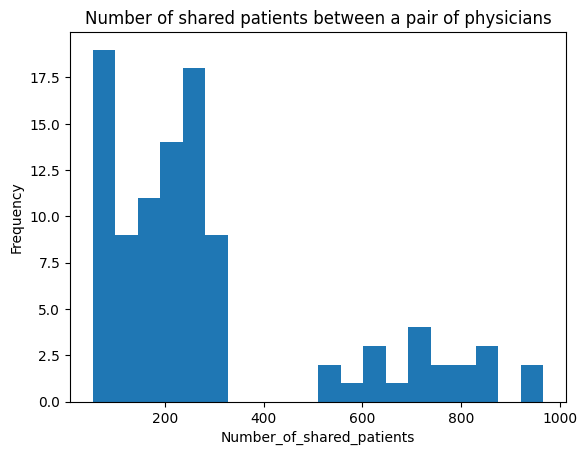

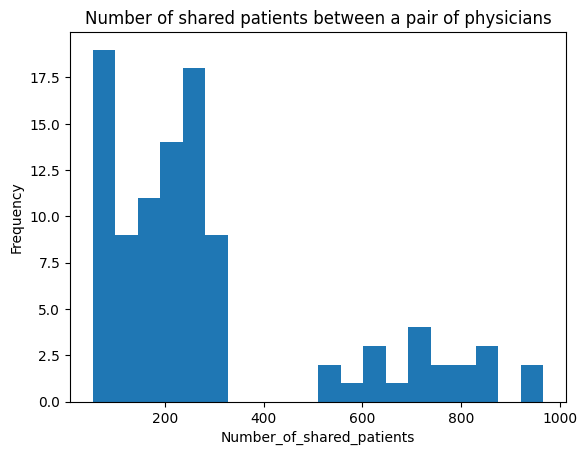

In [25]:
# plot the different counts of patient sharing relationships

synthetic_patient_sharing_network['Number_of_shared_patients'].plot(kind='hist', bins=20, title='Number of shared patients between a pair of physicians')
plt.xlabel('Number_of_shared_patients')
plt.ylabel('Frequency')
plt.show()

In [26]:
# Initialise graph
G = nx.Graph()

# Create weighted network
for index, row in synthetic_patient_sharing_network.iterrows():
    G.add_edge(row['Sender_Provider_ID'], row['Receiver_Provider_ID'], weight=row['Number_of_shared_patients'])

In [27]:
# add characteristics to each provider ID
# prepare dictionary for node characteristics
node_attributes = provider_categories.set_index('Provider_ID')['Category'].to_dict()

# add characteristics to each node
nx.set_node_attributes(G, node_attributes, 'Category')

# show all categories
categories = list(set(nx.get_node_attributes(G, 'Category').values()))
print("Provider categories:", categories)



Provider categories: ['Reha Center', 'University Clinic', 'Endocrinology Practice', 'Cardiology Practice', 'Specialised Clinic', 'Acute Clinic', 'GP Practice', 'Orthopedic Clinic']
Provider categories: ['Reha Center', 'University Clinic', 'Endocrinology Practice', 'Cardiology Practice', 'Specialised Clinic', 'Acute Clinic', 'GP Practice', 'Orthopedic Clinic']


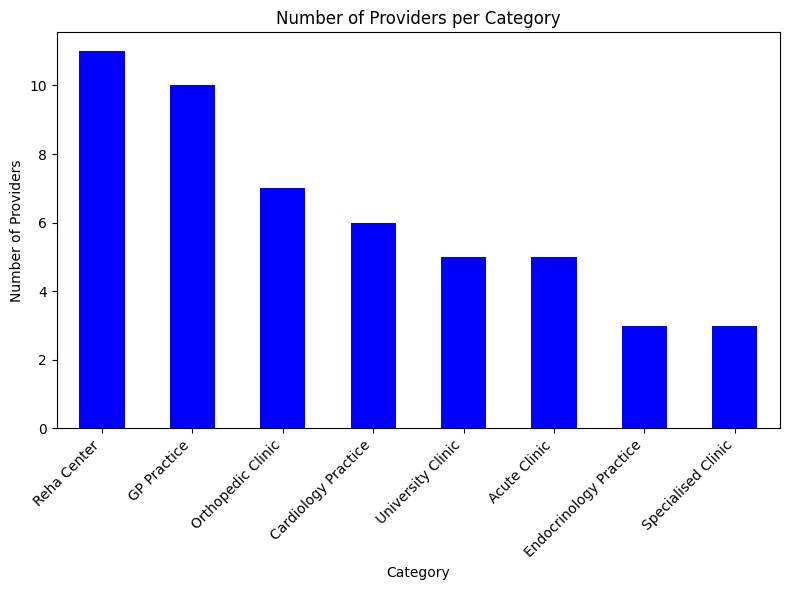

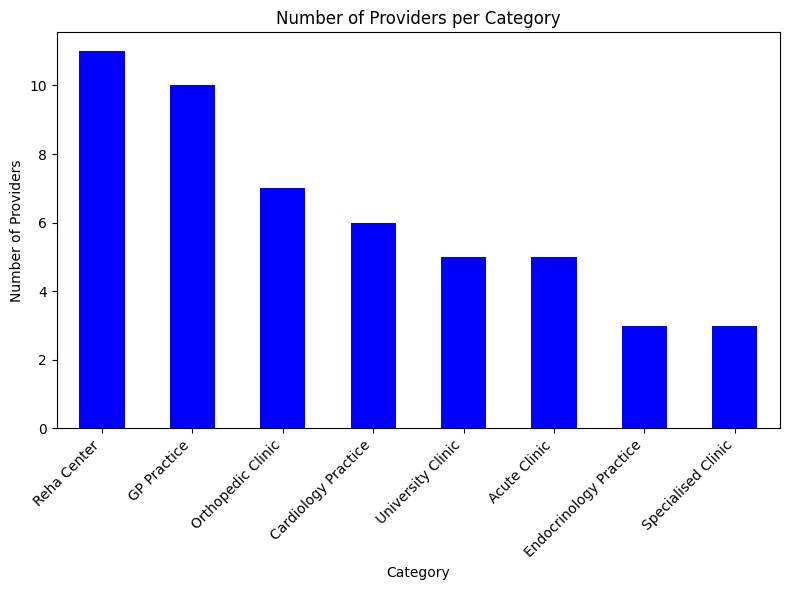

In [28]:
# plot the different counts of provider categories
category_counts = provider_categories['Category'].value_counts()

# Create a bar plot
category_counts.plot(kind='bar', color='blue', figsize=(8, 6))

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Providers')
plt.title('Number of Providers per Category')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

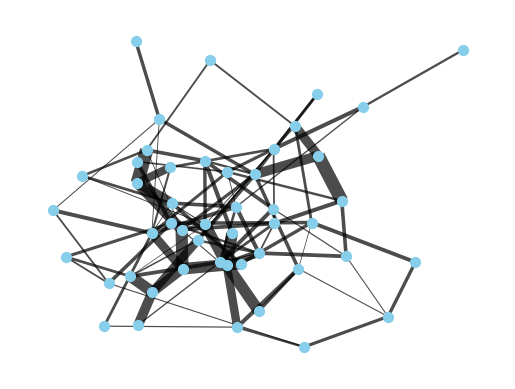

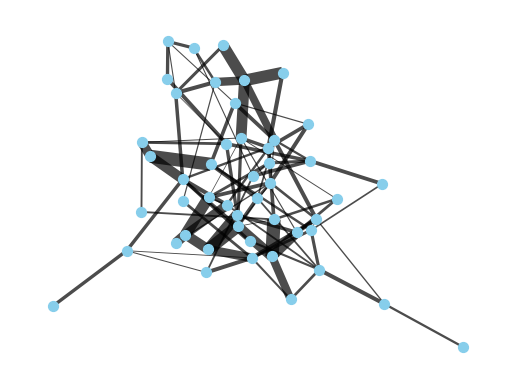

In [29]:
# Visualize network
# Test Fruchterman-Reingold-Algorithm for position of nodes
pos = nx.spring_layout(G, k=0.15, iterations=20)

# weightes edges
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# nodes
nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue')

# edges
nx.draw_networkx_edges(G, pos, width=[w/100 for w in edge_weights], alpha=0.7)

# remove axis
plt.axis('off')

# show plot
plt.show()

Number of communities detected: 6


<ipython-input-11-9d2753334fa2>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_communities)


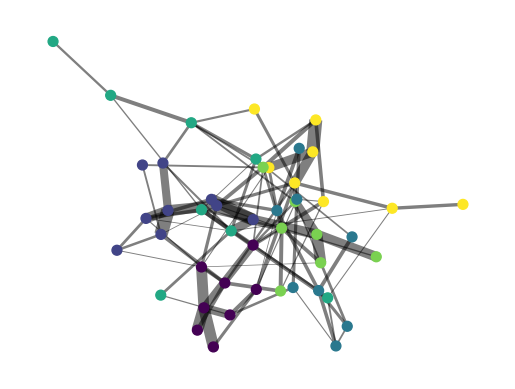

Number of communities detected: 6


<ipython-input-30-9d2753334fa2>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', num_communities)


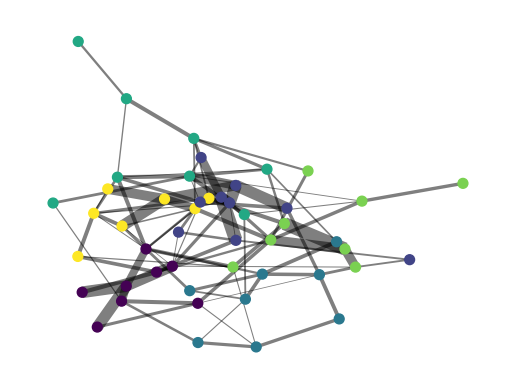

In [30]:
# Cluster analysis with louvain
# install and import extra package
!pip install python-louvain
import community as community_louvain
import matplotlib.cm as cm

# Compute the best partition using the Louvain method
partition = community_louvain.best_partition(G, weight='weight')

# Step 6: Determine the number of communities
num_communities = len(set(partition.values()))
print(f"Number of communities detected: {num_communities}")

# Step 7: Visualize the communities
pos = nx.spring_layout(G, k=0.15, iterations=20)
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Create a color map for the communities
cmap = cm.get_cmap('viridis', num_communities)
node_colors = [cmap(partition[node]) for node in G.nodes()]

# Draw the network
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=node_colors)
nx.draw_networkx_edges(G, pos, width=[w/100 for w in edge_weights], alpha=0.5)

plt.axis('off')
plt.show()

In [31]:
# cluster analysis with k-means

!pip install node2vec scikit-learn
from node2vec import Node2Vec

# Generate node embeddings
node2vec = Node2Vec(G, dimensions=64, walk_length=30, num_walks=200, workers=4)
model = node2vec.fit(window=10, min_count=1)

# Prepare embeddings
nodes = list(G.nodes())
embeddings = np.array([model.wv[str(node)] for node in nodes])

Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]

Computing transition probabilities:   0%|          | 0/48 [00:00<?, ?it/s]

## Further information:
### Node2Vec Algorithm:
It's an algorithm for generating vector representations of nodes in a graph. It does so by simulating random walks and capturing the network's local and global structures.

### Random Walks:
Simulated paths through the graph starting from each node. These walks generate sequences of nodes similar to sentences in natural language processing.

### Node Embeddings:
The code generates a feature vector (embedding) for each node in your graph. These embeddings capture the structural properties of the graph and represent each node in a high-dimensional vector space.


## Preperation for clustering:
K-means clustering requires numerical feature vectors as input. The embeddings serve as these feature vectors, enabling you to apply k-means to cluster the nodes based on their structural similarity in the network.

Parameters:
* dimensions=64: The number of dimensions for the embeddings. Each node will be represented by a 64-dimensional vector.
* walk_length=30: The length of each random walk. This determines how far the walks explore the graph from each node.
* num_walks=200: The number of random walks to perform from each node.
* workers=4: The number of CPU cores to use for parallel processing.

<ipython-input-13-769a4ea0ed01>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', k)


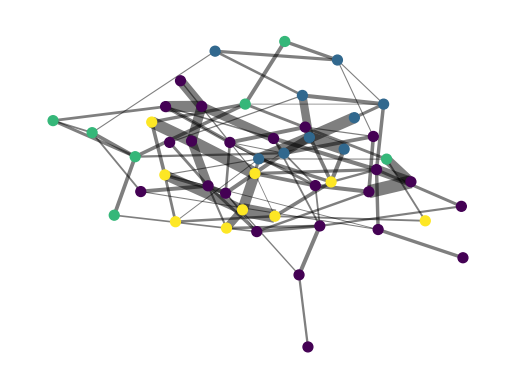

<ipython-input-32-769a4ea0ed01>:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', k)


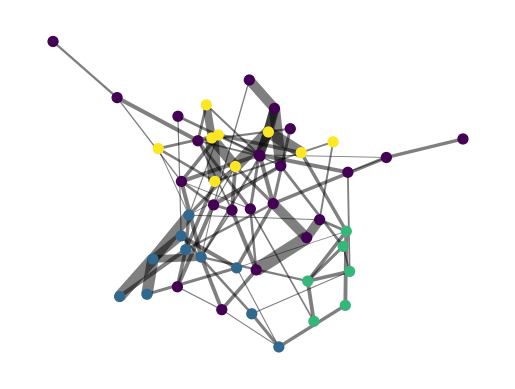

In [32]:
from sklearn.cluster import KMeans

# Define the number of clusters (k)
k = 4  # You can adjust this number based on your data

# Apply k-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(embeddings)

# Get cluster labels
labels = kmeans.labels_

# Map cluster labels to nodes
cluster_labels = dict(zip(nodes, labels))

# Add cluster labels as node attributes
nx.set_node_attributes(G, cluster_labels, 'cluster')


# Generate positions for visualization
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Get cluster labels for coloring
clusters = [cluster_labels[node] for node in G.nodes()]

# Define a color map
cmap = cm.get_cmap('viridis', k)

# Draw the nodes with cluster coloring
nx.draw_networkx_nodes(G, pos, node_size=50, node_color=clusters, cmap=cmap)

# Draw edges
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, alpha=0.5, width=[w/100 for w in edge_weights])

# Remove axis
plt.axis('off')

# Show plot
plt.show()

In [33]:
# Create a DataFrame with node, cluster, and category
cluster_df = pd.DataFrame({
    'Provider_ID': nodes,
    'Cluster': labels,
    'Category': [G.nodes[node].get('Category', 'Unknown') for node in nodes]
})

# Display the cluster assignments
print(cluster_df.head())

   Provider_ID  Cluster           Category
0    841976666        1  Orthopedic Clinic
1    147337803        3  Orthopedic Clinic
2    383450553        2  Orthopedic Clinic
3    496442646        2        GP Practice
4    491541578        1  University Clinic
   Provider_ID  Cluster           Category
0    841976666        1  Orthopedic Clinic
1    147337803        3  Orthopedic Clinic
2    383450553        2  Orthopedic Clinic
3    496442646        2        GP Practice
4    491541578        1  University Clinic


In [34]:
# Cross-tabulation of clusters and categories
cluster_category_counts = pd.crosstab(cluster_df['Cluster'], cluster_df['Category'])
print(cluster_category_counts)

Category  Acute Clinic  Cardiology Practice  Endocrinology Practice  \
Cluster                                                               
0                    1                    3                       2   
1                    1                    0                       1   
2                    2                    0                       0   
3                    1                    3                       0   

Category  GP Practice  Orthopedic Clinic  Reha Center  Specialised Clinic  \
Cluster                                                                     
0                   5                  3            5                   1   
1                   2                  1            3                   0   
2                   3                  1            1                   0   
3                   0                  2            1                   1   

Category  University Clinic  
Cluster                      
0                         3  
1                   

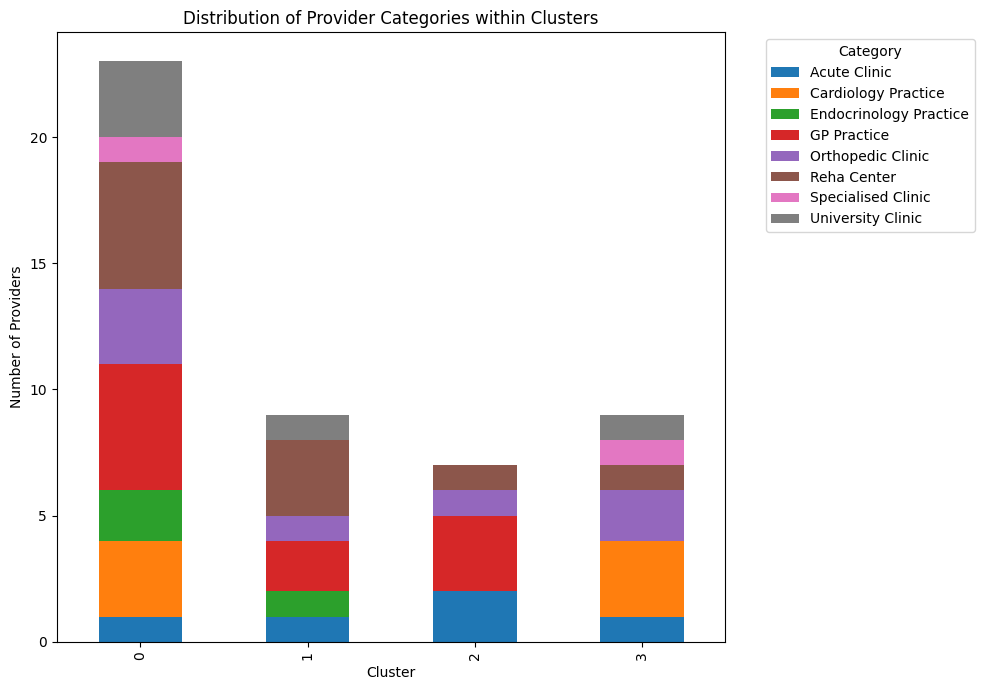

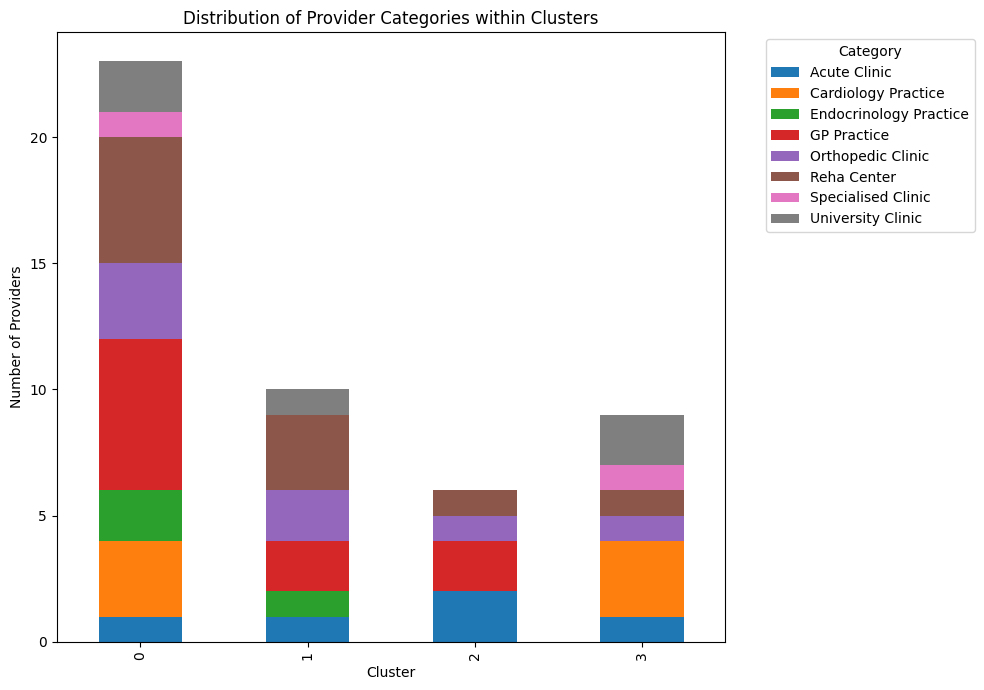

In [35]:
# Stacked bar chart
cluster_category_counts.plot(kind='bar', stacked=True, figsize=(10, 7))

plt.xlabel('Cluster')
plt.ylabel('Number of Providers')
plt.title('Distribution of Provider Categories within Clusters')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
# Calculation of centrality measures for each provider in a cluster

# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G, weight='weight', normalized=True)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G, distance='weight')

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality_numpy(G, weight='weight')

# Create a DataFrame with centrality measures
centrality_df = pd.DataFrame({
    'Provider_ID': list(G.nodes()),
    'Degree_Centrality': [degree_centrality[node] for node in G.nodes()],
    'Betweenness_Centrality': [betweenness_centrality[node] for node in G.nodes()],
    'Closeness_Centrality': [closeness_centrality[node] for node in G.nodes()],
    'Eigenvector_Centrality': [eigenvector_centrality[node] for node in G.nodes()]
})

cluster_centrality_df = pd.merge(cluster_df, centrality_df, on='Provider_ID')

print(cluster_centrality_df.head())

   Provider_ID  Cluster           Category  Degree_Centrality  \
0    841976666        1  Orthopedic Clinic           0.148936   
1    147337803        3  Orthopedic Clinic           0.148936   
2    383450553        2  Orthopedic Clinic           0.042553   
3    496442646        2        GP Practice           0.106383   
4    491541578        1  University Clinic           0.106383   

   Betweenness_Centrality  Closeness_Centrality  Eigenvector_Centrality  
0                0.272895              0.002559                0.136871  
1                0.094357              0.002209                0.405521  
2                0.001850              0.001756                0.004116  
3                0.030527              0.001954                0.014871  
4                0.000000              0.001092                0.160871  
   Provider_ID  Cluster           Category  Degree_Centrality  \
0    841976666        1  Orthopedic Clinic           0.148936   
1    147337803        3  Orthopedic

In [37]:
centrality_stats = cluster_centrality_df.groupby('Cluster').agg({
    'Degree_Centrality': ['mean', 'median', 'std', 'min', 'max'],
    'Betweenness_Centrality': ['mean', 'median', 'std', 'min', 'max'],
    'Closeness_Centrality': ['mean', 'median', 'std', 'min', 'max'],
    'Eigenvector_Centrality': ['mean', 'median', 'std', 'min', 'max']
})

print(centrality_stats)

        Degree_Centrality                                          \
                     mean    median       std       min       max   
Cluster                                                             
0                0.086957  0.085106  0.040529  0.021277  0.170213   
1                0.092199  0.085106  0.039805  0.042553  0.148936   
2                0.075988  0.085106  0.027073  0.042553  0.106383   
3                0.089835  0.085106  0.034925  0.042553  0.148936   

        Betweenness_Centrality                                     \
                          mean    median       std  min       max   
Cluster                                                             
0                     0.051281  0.040703  0.055669  0.0  0.227567   
1                     0.068455  0.036078  0.087740  0.0  0.272895   
2                     0.045064  0.030527  0.044054  0.0  0.119334   
3                     0.047898  0.033302  0.063323  0.0  0.196115   

        Closeness_Centrality    

In [38]:
# Top 3 providers

#Get the list of cluster IDs sorted from 1 to k
cluster_ids = sorted(cluster_centrality_df['Cluster'].unique())

top_n = 3

for cluster_id in cluster_ids:
    print(f"\nTop {top_n} providers in Cluster {cluster_id}:")
    cluster_nodes = cluster_centrality_df[cluster_centrality_df['Cluster'] == cluster_id]
    top_providers = cluster_nodes.sort_values(by='Degree_Centrality', ascending=False).head(top_n)
    print(top_providers[['Provider_ID', 'Category', 'Degree_Centrality', 'Betweenness_Centrality']])



Top 3 providers in Cluster 0:
    Provider_ID                Category  Degree_Centrality  \
7     260045822             GP Practice           0.170213   
23    781057736  Endocrinology Practice           0.148936   
8     692362342            Acute Clinic           0.148936   

    Betweenness_Centrality  
7                 0.227567  
23                0.046253  
8                 0.126735  

Top 3 providers in Cluster 1:
   Provider_ID           Category  Degree_Centrality  Betweenness_Centrality
0    841976666  Orthopedic Clinic           0.148936                0.272895
5    702269164       Acute Clinic           0.148936                0.098982
4    491541578  University Clinic           0.106383                0.000000

Top 3 providers in Cluster 2:
    Provider_ID      Category  Degree_Centrality  Betweenness_Centrality
3     496442646   GP Practice           0.106383                0.030527
21    138684919  Acute Clinic           0.106383                0.077706
20    895890631

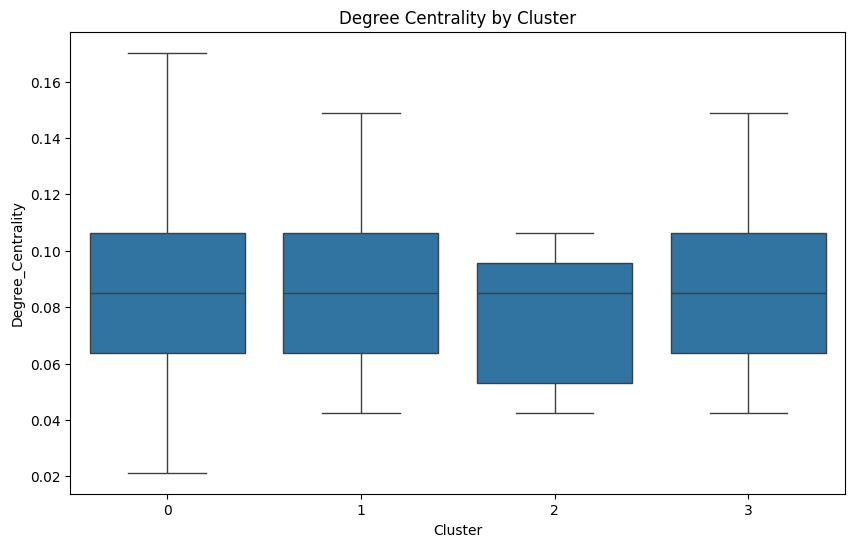

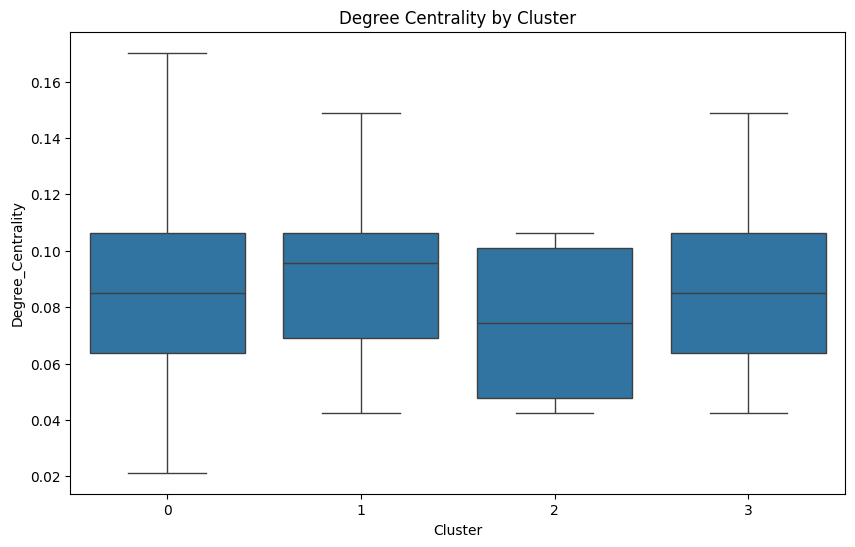

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Degree Centrality
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Degree_Centrality', data=cluster_centrality_df)
plt.title('Degree Centrality by Cluster')
plt.show()

# Interpreation:

In terms of my data, different values for k are tested (e.g. k=6 and k=10), and with k = 4 the clusters seem to have the highest reliability in terms of high in-cluster centrality and participation of a GP in each cluster (seen as a coordinator of care in theory).

## Observation of each cluster characteristics:
By integrating the insights from the boxplot, stacked bar chart, and tables given above the following aspects can be concluded:

Cluster 0 is the most diverse in terms of provider categories and has the most variability in connectivity. It contains key providers such as a GP Practice that not only have high connectivity but also act as critical bridges within the network. This cluster seems to act as a central hub, bringing together diverse provider types with varying levels of connectivity. There are no regional information available, but it might be the case, that these providers have low proximity and even might share the same clinical area.

Cluster 1 is smaller and more balanced, with University Clinics and Orthopedic Clinics playing major roles. The Orthopedic Clinic in this cluster is highly central, both in terms of connectivity and its bridging role, making it an important node for information flow. The high weights meaning numbers of patient sharing with other providers might be associated with specific diseases, e.g. the Orthopedic Clinic might refer severe cases to the University Clinics. Unobserved variables are e.g. working in the same research project, which could explain providers network position and so as networking behavior.

Cluster 2 has the least connected providers overall, with fewer dominant nodes. The focus here seems to be on GP Practices and Reha Centers, suggesting that this cluster is more specialized, with fewer critical connectors. It might be possible that this cluster has been evolved due to regional isolation.

Cluster 3 is more specialized, containing mainly Orthopedic Clinics and Endocrinology Practices. The Orthopedic Clinic in this cluster is key to bridging different parts of the network, making it an important connector within the cluster. The connection of Orthopedic and Endocrinology is not straight forward reasonable and further investigation is needed.


## Overall thoughts:
A GP practice, Reha clinic and Orthopedic Clinic in every cluster is reasonable, as this depict the patient flow within the system and so the patient sharing activities of the providers.

Cluster 0 is the most complex and interconnected, likely serving as the central part of the network.
Clusters 1, 2, and 3 are more specialized with fewer critical connectors, but they still contain important nodes that may act as gatekeepers within their respective clusters.

## Disclaimer:

As I have been working with synthetic data, this is just an application example to test how network analysis and cluster analysis can be applied to such a data structure and what clues can be derived from the analysis.

-

by
Sophia Cordes